# Cleaning all NaN values

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data/taxi_trip_pricing.csv")

df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [32]:
cat_cols = ["Time_of_Day", "Day_of_Week", "Traffic_Conditions", "Weather"]

for col in cat_cols:
    print(f"\n{df[col].value_counts()}")


Time_of_Day
Afternoon    371
Morning      283
Evening      203
Night         93
Name: count, dtype: int64

Day_of_Week
Weekday    655
Weekend    295
Name: count, dtype: int64

Traffic_Conditions
Low       397
Medium    371
High      182
Name: count, dtype: int64

Weather
Clear    667
Rain     227
Snow      56
Name: count, dtype: int64


Drop NaN values for all columns except for column Trip_Price

In [33]:
df = df.dropna(subset=df.columns.difference(["Trip_Price"]))

df.isna().sum()

Trip_Distance_km          0
Time_of_Day               0
Day_of_Week               0
Passenger_Count           0
Traffic_Conditions        0
Weather                   0
Base_Fare                 0
Per_Km_Rate               0
Per_Minute_Rate           0
Trip_Duration_Minutes     0
Trip_Price               26
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 588 entries, 0 to 998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       588 non-null    float64
 1   Time_of_Day            588 non-null    object 
 2   Day_of_Week            588 non-null    object 
 3   Passenger_Count        588 non-null    float64
 4   Traffic_Conditions     588 non-null    object 
 5   Weather                588 non-null    object 
 6   Base_Fare              588 non-null    float64
 7   Per_Km_Rate            588 non-null    float64
 8   Per_Minute_Rate        588 non-null    float64
 9   Trip_Duration_Minutes  588 non-null    float64
 10  Trip_Price             562 non-null    float64
dtypes: float64(7), object(4)
memory usage: 55.1+ KB


In [35]:
round(df.describe(), 2).T

,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,588.0,27.63,20.91,1.27,13.01,26.36,38.77,146.07
Passenger_Count,588.0,2.53,1.11,1.00,2.00,3.00,4.00,4.00
Base_Fare,588.0,3.51,0.87,2.01,2.72,3.54,4.27,5.00
Per_Km_Rate,588.0,1.23,0.43,0.50,0.85,1.20,1.59,2.00
Per_Minute_Rate,588.0,0.29,0.11,0.10,0.19,0.28,0.38,0.50
Trip_Duration_Minutes,588.0,61.87,31.98,5.01,36.59,61.60,88.38,119.84
Trip_Price,562.0,57.66,43.96,6.13,33.58,50.16,69.15,332.04


### Plotting

Text(0.5, 1.0, 'Price vs Distance')

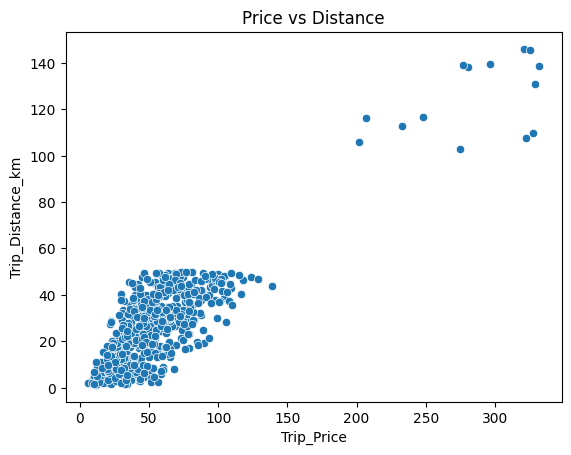

In [45]:
sns.scatterplot(
    data=df,
    x="Trip_Price",
    y="Trip_Distance_km"
)
plt.title("Price vs Distance")

Text(0.5, 1.0, 'Trip duration vs price')

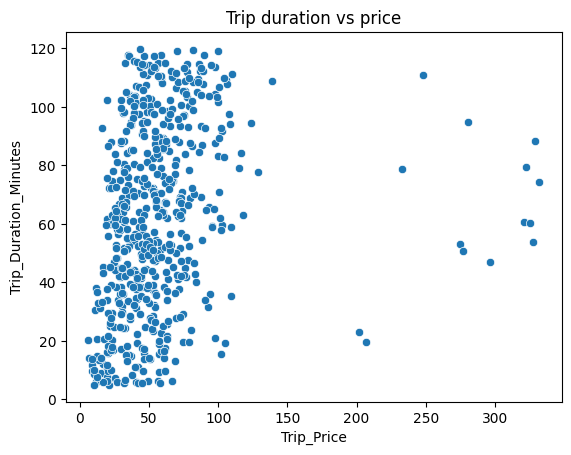

In [46]:
sns.scatterplot(
    data=df, 
    x="Trip_Price", 
    y="Trip_Duration_Minutes"
)
plt.title("Trip duration vs price")

# Drop outliers on features but not on target Trip_Price

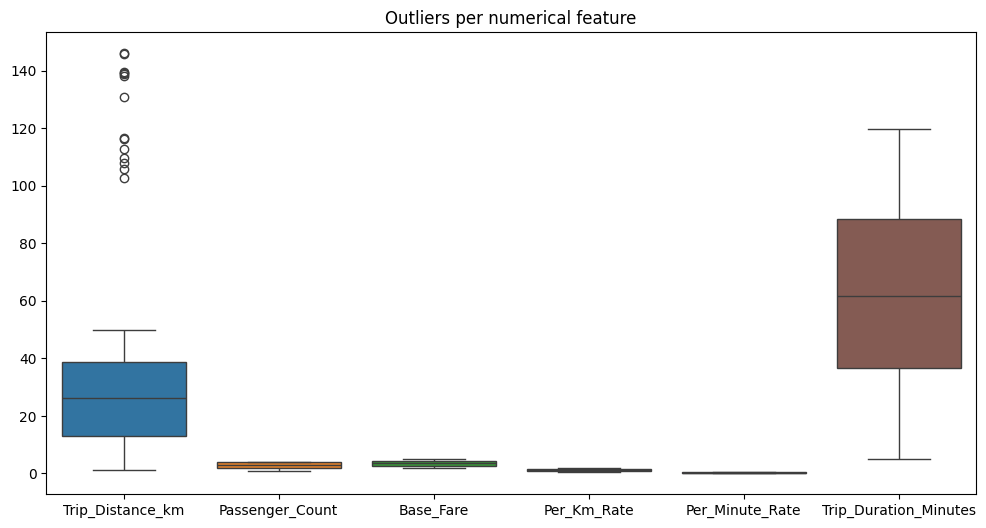

In [36]:
num_cols = df.select_dtypes(include="number").columns
num_cols = num_cols.drop("Trip_Price")

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols])
plt.title("Outliers per numerical feature")
plt.show()

Dropping outliers on numerical features

In [37]:
df_clean = df.copy()

for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_clean = df_clean[
        (df_clean[col] >= lower) &
        (df_clean[col] <= upper)
    ]

print("Before:", df.shape)
print("After:", df_clean.shape)

print("Rows removed:", df.shape[0] - df_clean.shape[0])

Before: (588, 11)
After: (574, 11)
Rows removed: 14


In [38]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574 entries, 0 to 998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       574 non-null    float64
 1   Time_of_Day            574 non-null    object 
 2   Day_of_Week            574 non-null    object 
 3   Passenger_Count        574 non-null    float64
 4   Traffic_Conditions     574 non-null    object 
 5   Weather                574 non-null    object 
 6   Base_Fare              574 non-null    float64
 7   Per_Km_Rate            574 non-null    float64
 8   Per_Minute_Rate        574 non-null    float64
 9   Trip_Duration_Minutes  574 non-null    float64
 10  Trip_Price             548 non-null    float64
dtypes: float64(7), object(4)
memory usage: 53.8+ KB


Correlation heatmap

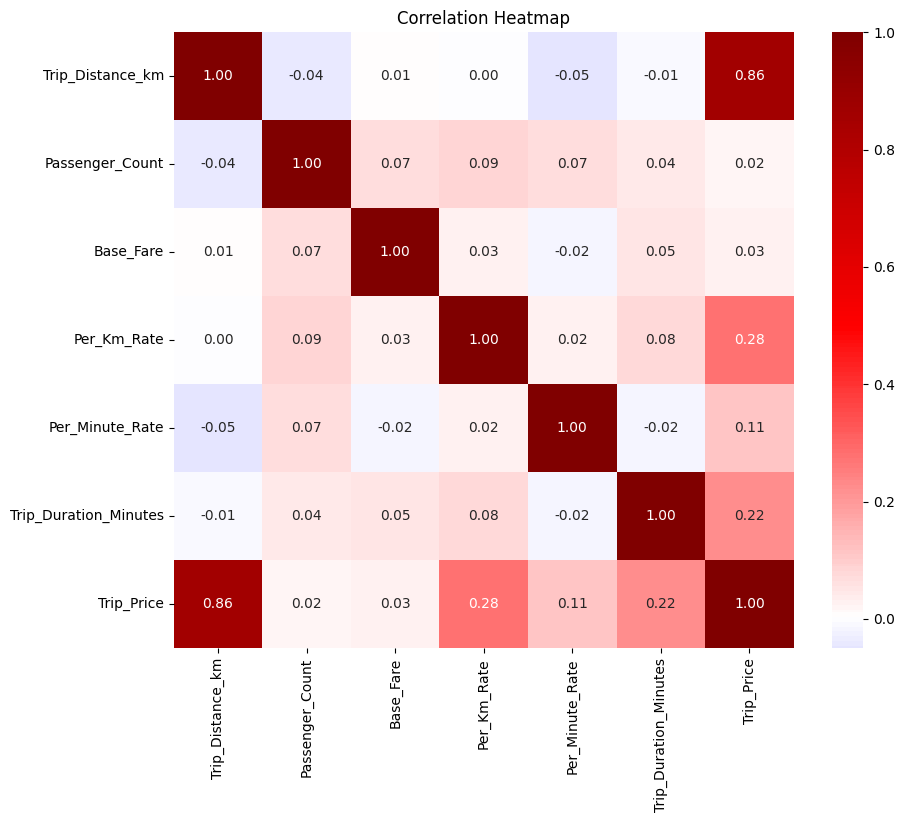

In [47]:
num_df = df.select_dtypes(include="number")
corr = num_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    data=corr,
    annot=True,
    fmt=".2f",
    cmap="seismic",
    center=0
)
plt.title("Correlation Heatmap")
plt.show()

Correlation on Trip Price

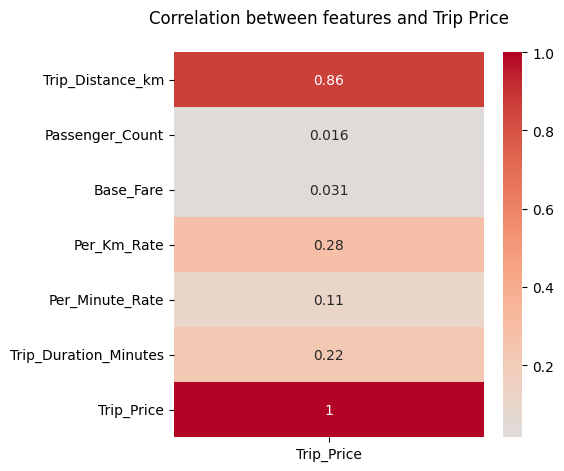

In [62]:
plt.figure(figsize=(5, 5))
sns.heatmap(
    corr[["Trip_Price"]],
    annot=True,
    cmap="coolwarm",
    center=0
)
plt.title("Correlation between features and Trip Price\n")
plt.show()


## Handle dummy variables
- Handling categorical columns with one-hot-encoding

In [39]:
df_clean = pd.get_dummies(df_clean, drop_first=True)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574 entries, 0 to 998
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Trip_Distance_km           574 non-null    float64
 1   Passenger_Count            574 non-null    float64
 2   Base_Fare                  574 non-null    float64
 3   Per_Km_Rate                574 non-null    float64
 4   Per_Minute_Rate            574 non-null    float64
 5   Trip_Duration_Minutes      574 non-null    float64
 6   Trip_Price                 548 non-null    float64
 7   Time_of_Day_Evening        574 non-null    bool   
 8   Time_of_Day_Morning        574 non-null    bool   
 9   Time_of_Day_Night          574 non-null    bool   
 10  Day_of_Week_Weekend        574 non-null    bool   
 11  Traffic_Conditions_Low     574 non-null    bool   
 12  Traffic_Conditions_Medium  574 non-null    bool   
 13  Weather_Rain               574 non-null    bool   
 14 

# Save to file

In [40]:
df_clean.to_csv("../data/taxi_cleaned.csv", index=False)